In [19]:
#  This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../Dataset_Emnist'): #https://www.kaggle.com/datasets/crawford/emnist
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../Dataset_Emnist\emnist-balanced-mapping.txt
../Dataset_Emnist\emnist-balanced-test.csv
../Dataset_Emnist\emnist-balanced-train.csv
../Dataset_Emnist\emnist-byclass-mapping.txt
../Dataset_Emnist\emnist-byclass-test.csv
../Dataset_Emnist\emnist-byclass-train.csv
../Dataset_Emnist\emnist-bymerge-mapping.txt
../Dataset_Emnist\emnist-bymerge-test.csv
../Dataset_Emnist\emnist-bymerge-train.csv
../Dataset_Emnist\emnist-digits-mapping.txt
../Dataset_Emnist\emnist-digits-test.csv
../Dataset_Emnist\emnist-digits-train.csv
../Dataset_Emnist\emnist-letters-mapping.txt
../Dataset_Emnist\emnist-letters-test.csv
../Dataset_Emnist\emnist-letters-train.csv
../Dataset_Emnist\emnist-mnist-mapping.txt
../Dataset_Emnist\emnist-mnist-test.csv
../Dataset_Emnist\emnist-mnist-train.csv
../Dataset_Emnist\emnist_source_files\emnist-balanced-test-images-idx3-ubyte
../Dataset_Emnist\emnist_source_files\emnist-balanced-test-labels-idx1-ubyte
../Dataset_Emnist\emnist_source_files\emnist-balanced-train-images-idx3-

In [20]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
testing_letter = pd.read_csv('../Dataset_Emnist/emnist-letters-test.csv')
training_letter = pd.read_csv('../Dataset_Emnist/emnist-letters-train.csv')

In [21]:
print(training_letter.shape)
print(testing_letter.shape)


(88799, 785)
(14799, 785)


In [22]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


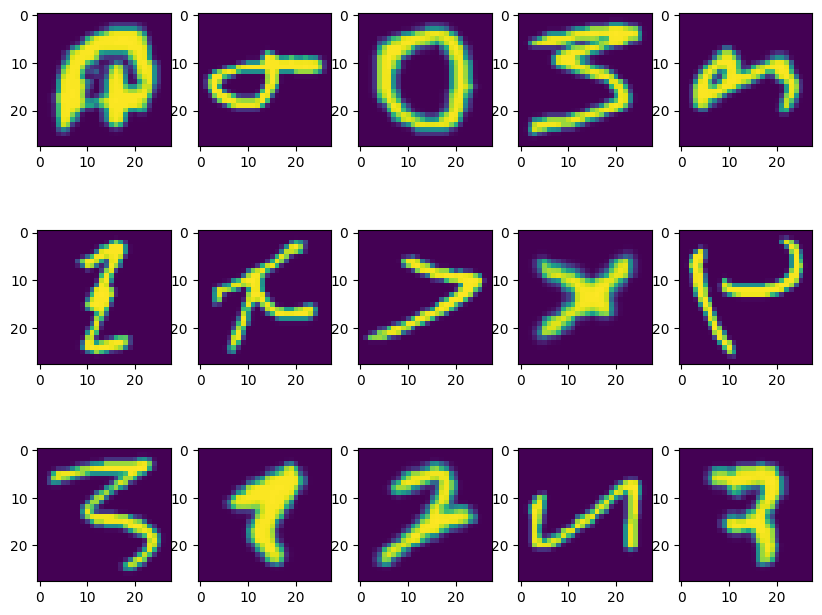

In [23]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))



In [24]:
import tensorflow as tf

In [25]:
# Preprocesssing
# 1. Normalisation and reshaping of data

# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [26]:
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [27]:
# Lets create a CNN for the classification of these random images.

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [30]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [31]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
# Adding Callback API's to save best weights and change lr

MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [33]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2219/2220 [============================>.] - ETA: 0s - loss: 0.5590 - accuracy: 0.8247
Epoch 1: val_accuracy improved from -inf to 0.88575, saving model to Best_points.h5
2220/2220 [==============================] - 126s 56ms/step - loss: 0.5589 - accuracy: 0.8247 - val_loss: 0.3521 - val_accuracy: 0.8858 - lr: 0.0010
Epoch 2/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2799 - accuracy: 0.9095
Epoch 2: val_accuracy did not improve from 0.88575
2220/2220 [==============================] - 124s 56ms/step - loss: 0.2799 - accuracy: 0.9095 - val_loss: 0.3484 - val_accuracy: 0.8848 - lr: 0.0010
Epoch 3/10
2220/2220 [==============================] - ETA: 0s - loss: 0.2191 - accuracy: 0.9273
Epoch 3: val_accuracy improved from 0.88575 to 0.89398, saving model to Best_points.h5
2220/2220 [==============================] - 124s 56ms/step - loss: 0.2191 - accuracy: 0.9273 - val_loss: 0.3300 - val_accuracy: 0.8940 - lr: 0.0010
Epoch 4/10
2219/2220 [===============

In [34]:
# Let's plot Accuracy vs Val_Accuracy to further evaluation.

import seaborn as sns

Text(0, 0.5, 'Accuray')

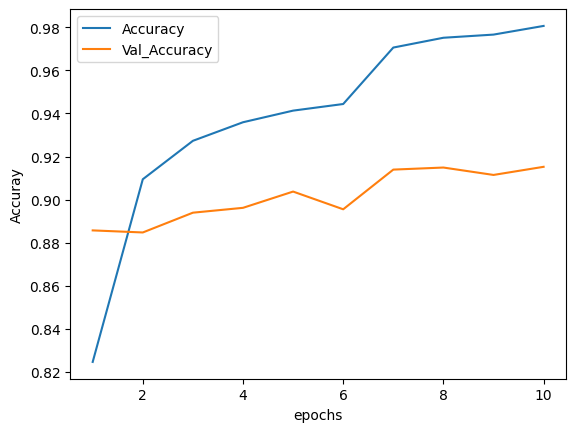

In [35]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [36]:
# Changing the test_split size to 0.15 to see if validation score increases or not

train_x2,test_x2,train_y2,test_y2 = train_test_split(train_images,y1,test_size=0.15,random_state = 42)

In [37]:
history1 = model.fit(train_x2,train_y2,epochs=10,validation_data=(test_x2,test_y2))

Epoch 1/10
2359/2359 [==============================] - 134s 57ms/step - loss: 0.0720 - accuracy: 0.9773 - val_loss: 0.4225 - val_accuracy: 0.9174
Epoch 2/10
2359/2359 [==============================] - 138s 59ms/step - loss: 0.0650 - accuracy: 0.9780 - val_loss: 0.4505 - val_accuracy: 0.9167
Epoch 3/10
2359/2359 [==============================] - 159s 67ms/step - loss: 0.0602 - accuracy: 0.9784 - val_loss: 0.4524 - val_accuracy: 0.9149
Epoch 4/10
2359/2359 [==============================] - 170s 72ms/step - loss: 0.0551 - accuracy: 0.9796 - val_loss: 0.4291 - val_accuracy: 0.9158
Epoch 5/10
2359/2359 [==============================] - 174s 74ms/step - loss: 0.0526 - accuracy: 0.9804 - val_loss: 0.4497 - val_accuracy: 0.9158
Epoch 6/10
2359/2359 [==============================] - 167s 71ms/step - loss: 0.0506 - accuracy: 0.9806 - val_loss: 0.4522 - val_accuracy: 0.9151
Epoch 7/10
2359/2359 [==============================] - 173s 73ms/step - loss: 0.0485 - accuracy: 0.9809 - val_loss: 0

Text(0, 0.5, 'Accuray')

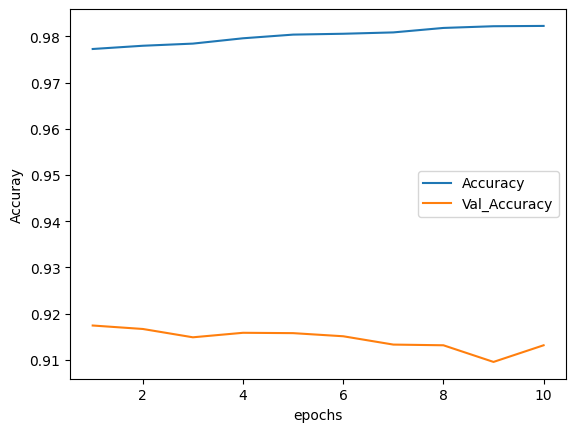

In [38]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [49]:
# As the validation score score went down we won't be changing the test_split size.
# Thus the above model is better than the latter one.

# https://stackoverflow.com/questions/63819265/why-do-we-need-to-recreate-the-model-every-time


# import cv2

# image_file = "../data/because.jpeg"
# img = cv2.imread(image_file)


# img=cv2.imread("../data/because.jpeg",cv2.IMREAD_GRAYSCALE)
# img=cv2.resize(img,(28,28))
# img=img/255.0
# prediction=model.predict(img.reshape(1, 28, 28))
# # prediction=model.predict(img)

# var = prediction.astype(str)
# print(var)


# # Load the preprocessed image and the trained model
# img = cv2.imread('../data/because.jpeg', cv2.IMREAD_GRAYSCALE)
# model = tf.keras.models.load_model('trained_model.h5')

# # Reshape the image to the expected input shape of the model
# img = cv2.resize(img, (28, 28))
# img = img.reshape(1, 28, 28, 1)

# # Normalize the image
# img = img / 255.0

# # Predict the output
# predicted_output = model.predict(img)
# predicted_output = np.argmax(predicted_output)
# predicted_output = chr(predicted_output + 65)

# model.save('trained_model.h5')


In [61]:
# from tensorflow.keras.models import load_model

# model = load_model('Best_points.h5')

# # Load the preprocessed image and the trained model
# img = cv2.imread('../data/temp/no_noise.jpeg', cv2.IMREAD_GRAYSCALE)
# model = tf.keras.models.load_model('trained_model.h5')

# # Reshape the image to the expected input shape of the model
# img = cv2.resize(img, (28, 28))
# img = img.reshape(1, 28, 28, 1)

# # Normalize the image
# img = img / 255.0

# # Predict the output
# predicted_output = model.predict(img)
# predicted_output = np.argmax(predicted_output)
# predicted_output = chr(predicted_output + 65)
# print(predicted_output)

# Use the model to make predictions on X_test
# y_pred = model.predict(test_y)

# # Print the predicted values
# print(y_pred.argmax())